# Netflix User Analysis

### The Netflix Userbase Dataset used for this analysis is sourced from kaggle, a popular platform for datasets and data science projects. The dataset provides a snapshot of a sample Netflix userbase, showcasing various aspects of user subscriptions, revenue, account details, and activity. It is  a synthetic representation and does not contain actual Netflix user data.

#### The datasets includes 10 varibles, each representing a specific aspect of user information:
#### User ID : Unique identifier for each user.
#### Subscription Type : Type of Subscription chosen by the user (Basic,Standard,Premium).
#### Monthly Revenue : The Monthly Revenue generated from each user's subscription.
#### Join Date : The date when the user joined Netflix.
#### Last Payment Date : The date of the user's last payment.
#### Country : The counntry in which the user is located.
#### Age : The Age of the user.
#### Gender : The gender of the user.
#### Device : The type of device used for watching Netflix content (Smartphone,Tablet,Smart TV ,Laptop).
#### Plan Duration : The Duration of the user's Subscription plan.

## Data Preparation and Cleaning

In [1]:
#Importing the libraries
import pandas as pd # for data manipulation and analysis.
import numpy as np # for numerical computing.
import matplotlib.pyplot as plt # for creating static, interactive, and animated visualizations. 
import seaborn as sns # for statistical data visualization.
import warnings # to handle warnings.
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset into a data frame using pandas
df = pd.read_csv("Netflix Userbase.csv")

In [3]:
# Display the first 10 rows of the DataFrame
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


In [4]:
#Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
#Number of rows and columns
df.shape

(2500, 10)

In [6]:
#Checking Descriptive statistics
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [7]:
#Values counts of categorical varibles
print(df['Subscription Type'].value_counts(),'\n',
      df['Gender'].value_counts(),'\n',
      df['Device'].value_counts(),'\n',
      df['Country'].value_counts(),'\n',
      df['Plan Duration'].value_counts())

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64 
 Gender
Female    1257
Male      1243
Name: count, dtype: int64 
 Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64 
 Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64 
 Plan Duration
1 Month    2500
Name: count, dtype: int64


In [8]:
#range of monthly Revenue
range_Revenue = df['Monthly Revenue'].max()-df['Monthly Revenue'].min()
print("The Range of Monthly Revenue is ${}".format(range_Revenue))

The Range of Monthly Revenue is $5


In [9]:
#range of Subscriber Age
range_Age = df['Age'].max()-df['Age'].min()
print("The Range of People Age is {} Years".format(range_Age))

The Range of People Age is 25 Years


In [10]:
#changing the datatype
df["Join Date"] = df["Join Date"].astype("datetime64[ns]")

In [11]:
df["Join Date"].dtype

dtype('<M8[ns]')

In [12]:
#changing the datatype
df["Last Payment Date"] = df["Last Payment Date"].astype("datetime64[ns]")

In [13]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [14]:
pd.DatetimeIndex(df["Last Payment Date"])

DatetimeIndex(['2023-10-06', '2023-06-22', '2023-06-27', '2023-06-26',
               '2023-06-28', '2023-06-27', '2023-06-25', '2023-06-24',
               '2023-06-23', '2023-06-22',
               ...
               '2023-11-07', '2023-12-07', '2023-11-07', '2023-07-15',
               '2023-12-07', '2023-12-07', '2023-07-14', '2023-07-15',
               '2023-12-07', '2023-12-07'],
              dtype='datetime64[ns]', name='Last Payment Date', length=2500, freq=None)

## Exploratory Analysis and Visualization


### In this section, I will create visualization to gain an overview of the data's counts and distributions for each varible. By plotting the distribution of each varible, we can better understand the dataset and identify any patterns or insights.

In [15]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline



In [16]:
#sum of Monthly Revenue
Sum = df["Monthly Revenue"].sum()
print("The Sum of revenue is ${}".format(Sum))

The Sum of revenue is $31271


In [17]:
#The Average Age of People
Avg = df["Age"].mean()
print("The Average Age of people is {} Years".format(Avg))

The Average Age of people is 38.7956 Years


In [18]:
#Total number of unique values from whole Data Frame
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

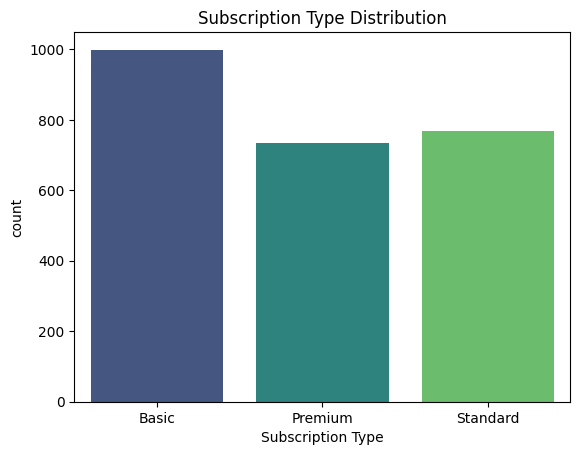

In [19]:
# Subscription Type Distribution
num_subscription_type=len(df['Subscription Type'].unique())
custom_palette = sns.color_palette('viridis',n_colors=num_subscription_type)


plt.title("Subscription Type Distribution")
sns.countplot(data=df, x="Subscription Type",palette=custom_palette)
plt.grid(False)
plt.show()

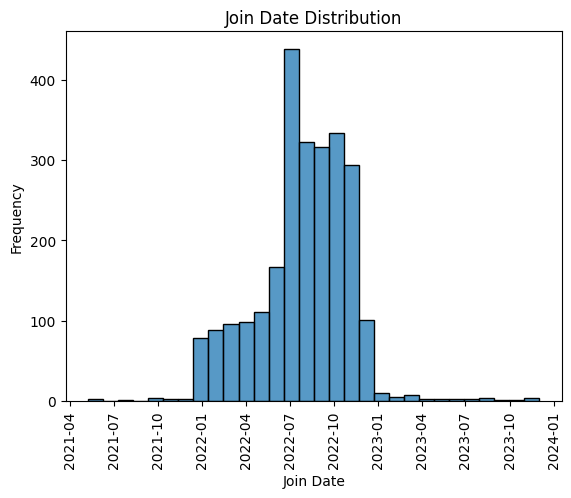

In [20]:
#Join Date Distribution
plt.title("Join Date Distribution")
sns.histplot(data=df, x="Join Date", bins=30)  # Adjusted bins 
plt.xticks(rotation=90)  # Rotated tick labels for better readability
plt.xlabel("Join Date")  # Added x-axis label
plt.ylabel("Frequency")  # Added y-axis label
plt.show()

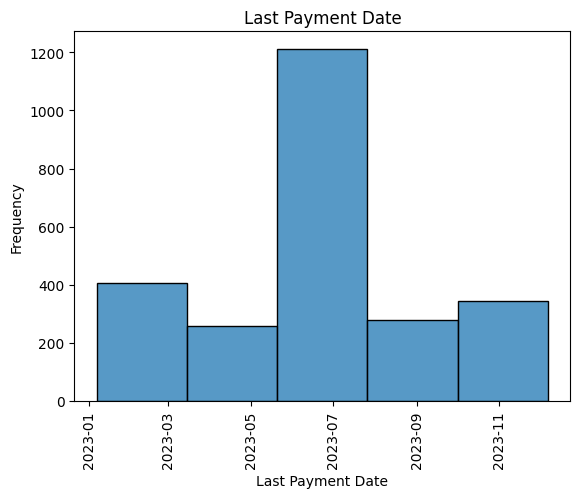

In [21]:
#Last payment date distribution
plt.title("Last Payment Date")
sns.histplot(df, x="Last Payment Date", bins=5)
plt.xticks(rotation=90)
plt.xlabel("Last Payment Date")  # Added x-axis label
plt.ylabel("Frequency")  # Added y-axis label
plt.show()

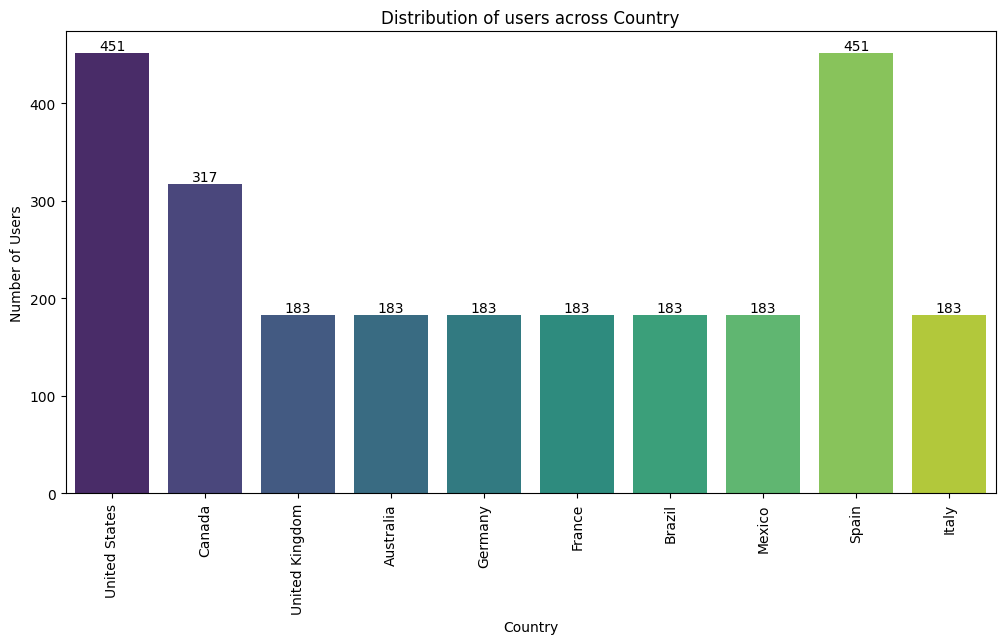

In [22]:
#Number of Netflix user in each country
num_countries=len(df['Country'].unique())
custom_palette = sns.color_palette('viridis',n_colors=num_countries)

plt.figure(figsize=(12, 6))  # Adjusting the figure size for better visibility
plt.title("Distribution of users across Country")
ax = sns.countplot(df, x="Country", palette=custom_palette)
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel("Number of Users")
plt.xticks(rotation=90)
plt.show()

### The plotted countplot effectively displays the  distribution of Netflix Users across different countries, notably  highlinting that the United States and Spain have th highest number of users, with a count of 451 users.

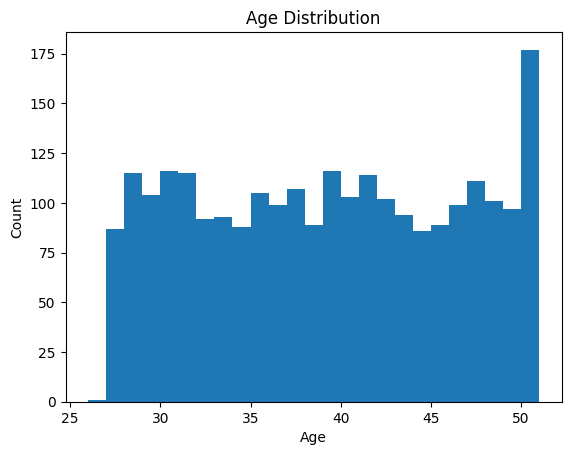

In [23]:
#Age Distribution
plt.title("Age Distribution")
plt.hist(df["Age"], bins=25) 
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### The Age Distribution revels that the majority of Netflix users fall within the range of 50 to 51.

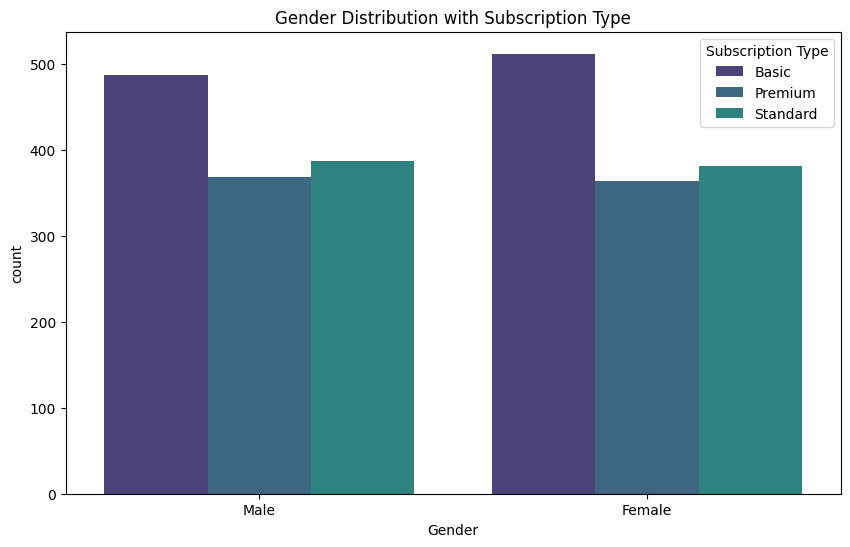

In [24]:
num_subscription_type = len(df['Subscription Type'].unique())
gender = len(df['Gender'].unique())
combined_unique = num_subscription_type + gender  # Combine the counts of unique subscription types and genders

custom_palette = sns.color_palette('viridis', n_colors=combined_unique)

plt.figure(figsize=(10, 6))  # Adjusting the figure size for clarity
plt.title("Gender Distribution with Subscription Type")
sns.countplot(x="Gender", hue="Subscription Type", data=df, palette=custom_palette)

# Adjusting legend position for better alignment
plt.legend(loc='upper right', title='Subscription Type')
plt.grid(False)
plt.show()

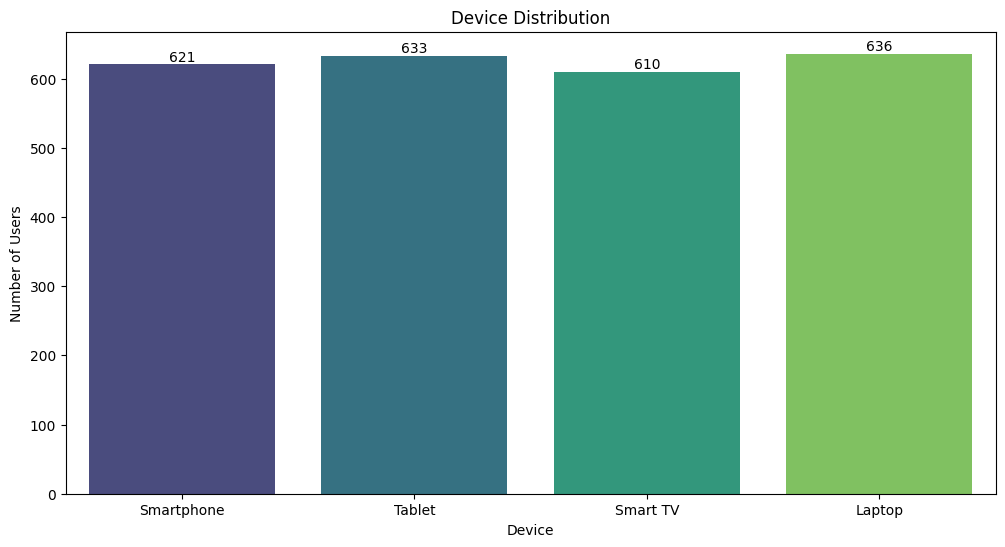

In [25]:
num_device=len(df['Device'].unique())
custom_palette = sns.color_palette('viridis',n_colors=num_device)

plt.figure(figsize=(12, 6))  
plt.title("Device Distribution")
ax = sns.countplot(df, x="Device", palette=custom_palette)
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel("Number of Users")
plt.show()

In [26]:
count_sub_type = df["Subscription Type"].value_counts()
count_device = df["Device"].value_counts()
count_country = df["Country"].value_counts()
count_age = df["Age"].value_counts()
count_gender = df["Gender"].value_counts()

In [27]:
count_sub_type

Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [28]:
# Create table which shows the relationship between Subscription Type and Country.
pd.crosstab(columns=df["Subscription Type"], index=df["Country"])

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [29]:
# Create table which shows the relationship between Subscription Type and Gender.
pd.crosstab(columns=df["Gender"], index=df["Subscription Type"])

Gender,Female,Male
Subscription Type,,
Basic,512,487
Premium,364,369
Standard,381,387


In [30]:
df["Age Group"] = pd.cut(df["Age"], bins=5, labels=["26-30", "31-35", "36-40", "41-45", "45-More"])

In [31]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Age Group
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,26-30
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,31-35
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,41-45
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,45-More
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,31-35


In [32]:
# Create table which shows the relationship between Subscription Type and Age Group.
pd.crosstab(columns=df["Subscription Type"], index=df["Age Group"])

Subscription Type,Basic,Premium,Standard
Age Group,,,
26-30,224,171,143
31-35,175,150,152
36-40,212,144,173
41-45,193,129,148
45-More,195,139,152


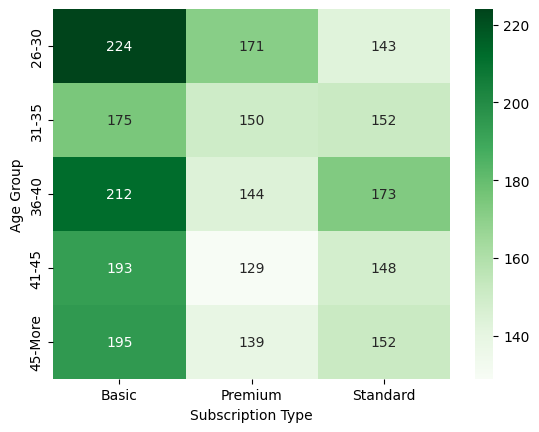

In [33]:
# Creating heatmap  which showing the distribution of subscription types across different age groups, providing a clear visual representation of how different age groups subscribe to different plans. 
sns.heatmap(pd.crosstab(columns=df["Subscription Type"], index=df["Age Group"]), annot=True, fmt="d", cmap="Greens")
plt.show()

###  The heatmap reveals that the Basic subscription plan is most frequently chosen by users aged 26-30.
###  Across all age groups, the Basic subscription plan is consistently more popular than the other subscription types..

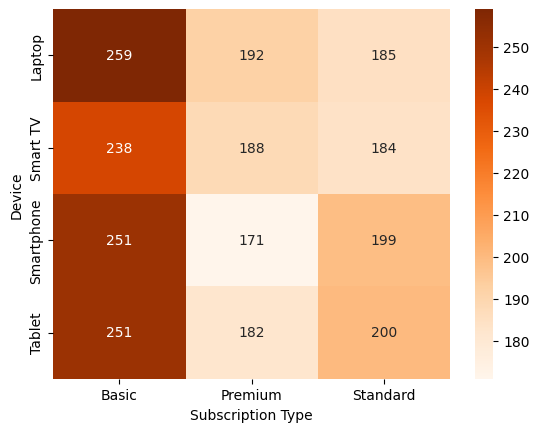

In [34]:
# Creating heatmap  which showing the distribution of subscription types across different devices, providing a clear visual representation of how different Devices subscribe to different plans. 
sns.heatmap(pd.crosstab(columns=df["Subscription Type"], index=df["Device"]), annot=True, fmt="d", cmap="Oranges")
plt.show()

### The heatmap clearly shows that the Basic subscription is most frequently accessed on laptops.

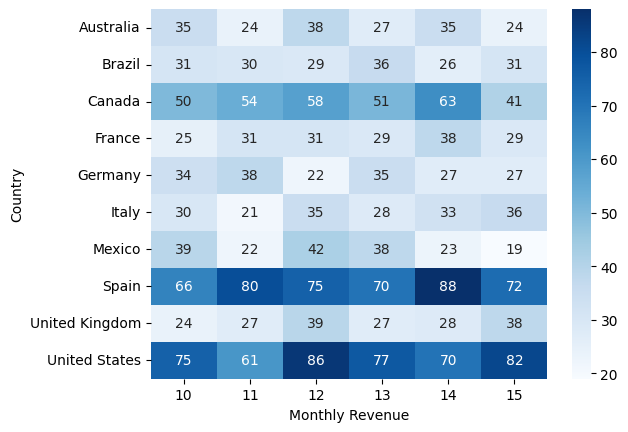

In [35]:
# Creating heatmap  which showing the monthly revenue across different country . 
sns.heatmap(pd.crosstab(columns=df["Monthly Revenue"], index=df["Country"]), annot=True, fmt="d", cmap="Blues")
plt.show()

### It is evident that the United States and Spain are the top revenue-generating countries.


# Conclusion
### By focusing on these insights, Netflix can enhance its subscription plans, optimize marketing strategies, personalize content, and ultimately drive growth and customer satisfaction. Leveraging data-driven decisions will help Netflix maintain its competitive edge and continue to thrive in the dynamic streaming industry.

